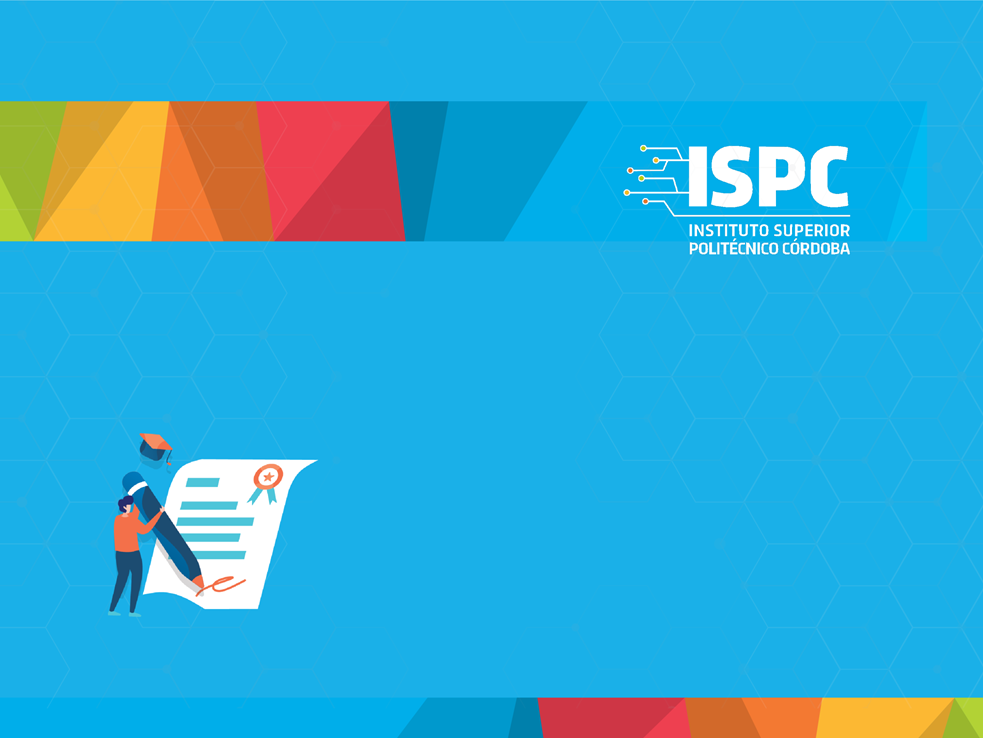

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [120]:
# Tratamiento de datos
# ==============================================================================

# Gráficos
# ==============================================================================

# Preprocesado y modelado
# ==============================================================================

# Configuración matplotlib
# ==============================================================================

# Configuración warnings
# ==============================================================================


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import make_regression

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [4]:
n_samples, n_features = 1000, 5
rng = np.random.RandomState(0)
X,y = make_regression(n_samples, n_features, noise = 10, random_state=rng)

In [5]:
datos_creados = np.c_[X,y]
datos = pd.DataFrame(datos_creados, columns = ['ventas', 'tv', 'radio', 'periodico', 'redes', 'grafica' ])

In [6]:
datos

,ventas,tv,radio,periodico,redes,grafica
0,-1.718650,0.969624,0.196770,0.143464,-1.056957,-18.793739
1,-0.998192,-1.004323,-0.766705,-1.067742,-1.373043,-209.202089
2,-1.652804,0.174680,-1.400256,0.063896,1.065927,-40.190887
3,-0.422315,0.892474,0.555963,0.228053,0.104714,51.843160
4,-1.023173,0.177158,0.976382,-0.911881,0.106720,-81.601143
...,...,...,...,...,...,...
995,-0.072073,1.665450,2.599867,0.862707,0.884115,219.933596
996,0.945539,0.182100,-0.526243,1.510525,-0.201385,128.914396
997,0.765002,0.030386,0.707135,-2.256250,0.867665,-77.709960
998,-0.704341,0.374948,-0.999278,-0.627299,1.074704,-12.600054


In [7]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
31,grafica,tv,0.613060,0.613060
11,tv,grafica,0.613060,0.613060
33,grafica,periodico,0.605504,0.605504
23,periodico,grafica,0.605504,0.605504
5,ventas,grafica,0.375828,0.375828
30,grafica,ventas,0.375828,0.375828
34,grafica,redes,0.288919,0.288919
29,redes,grafica,0.288919,0.288919
17,radio,grafica,0.127158,0.127158
32,grafica,radio,0.127158,0.127158


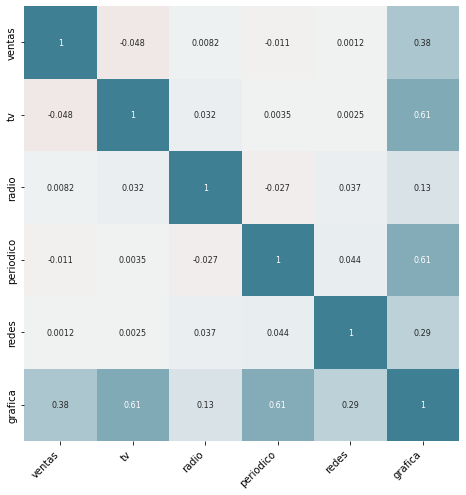

In [8]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

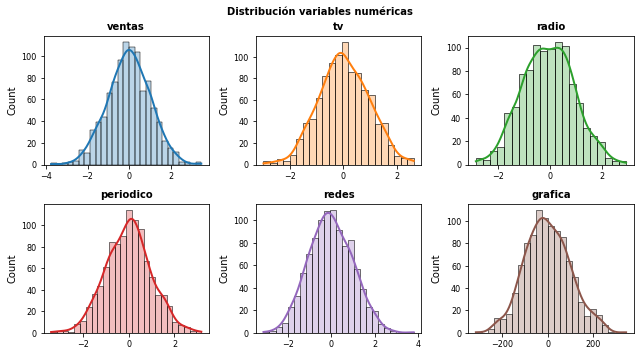

In [9]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

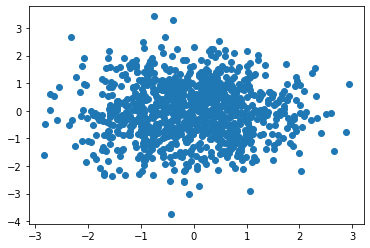

In [10]:
plt.scatter(datos['radio'],datos['ventas'])

In [11]:
# División de los datos en train y test
# ==============================================================================

X = datos[['tv', 'radio', 'periodico', 'redes', 'grafica']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

# print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     2683.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:26:29   Log-Likelihood:                 22.752
No. Observations:                 800   AIC:                            -33.50
Df Residuals:                     794   BIC:                            -5.396
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0082      0.008     -0.981      0.3

In [12]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================

y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

C:\Users\Dicsys\AppData\Local\Temp\ipykernel_20736\3894972359.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
c:\Users\Dicsys\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


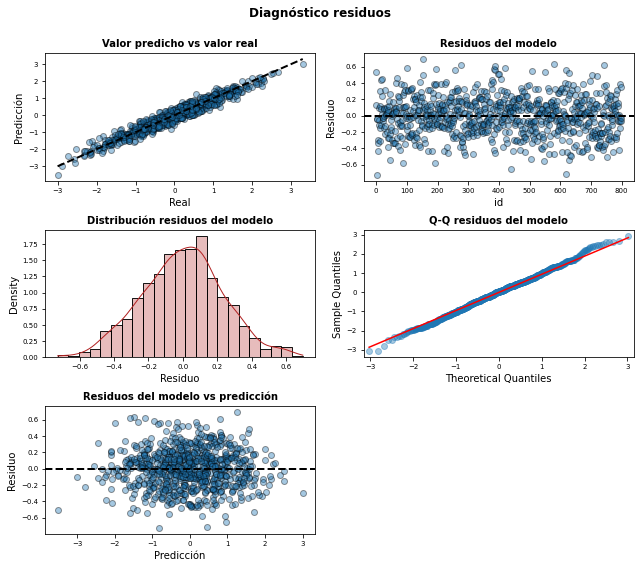

In [15]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");